# Project Definition: Plant Disease Detection with Transfer Learning



## Project Overview:
Early detection of plant diseases is critical for sustainable agriculture and food security.  
This project tackles the challenge of classifying plant leaf images into disease categories using modern deep learning techniques.  
Our goal is to build a reliable image classifier that can assist farmers and researchers in identifying plant diseases based on leaf images.

## Dataset Description:
- **Source:** PlantVillage Dataset (Kaggle)
- **Classes Used:** 8 selected disease categories, each with a subset of images
- **Image Type:** RGB images of plant leaves
- **Image Size:** Resized to **256x256** pixels
- **Data Split:** Training and Testing subsets with less than 100 images per class

## Machine Learning Approach:
- **Type:** Supervised Learning — **Multiclass Image Classification**
- **Technique:** Transfer Learning using pre-trained CNN models (ResNet50, EfficientNetB0, MobileNetV2)
- **Objective:** Classify images into one of the **8 disease categories** based on visual features

## Challenge:
- Limited training data per class
- High variability in leaf appearance
- Ensuring the model generalizes well on unseen data



In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
dataset = 'https://www.kaggle.com/datasets/emmarex/plantdisease'

In [ ]:
od.download(dataset)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: isihack
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease


100%|██████████| 658M/658M [00:08<00:00, 77.7MB/s]


In [ ]:
import os

print("Contents of ./plantdisease:")
print(os.listdir('./plantdisease'))

Contents of ./plantdisease:
['plantvillage', 'PlantVillage']


In [ ]:
import os

paths_to_check = [
    './plantdisease/plantvillage',
    './plantdisease/PlantVillage',
    './plantdisease/extracted'
]

for path in paths_to_check:
    print(f"\n Checking: {path}")
    try:
        print(" Subfolders:", os.listdir(path))
    except Exception as e:
        print(" Error:", e)


 Checking: ./plantdisease/plantvillage
 Subfolders: ['PlantVillage']

 Checking: ./plantdisease/PlantVillage
 Subfolders: ['Potato___healthy', 'Tomato_Septoria_leaf_spot', 'Tomato__Target_Spot', 'Tomato_Bacterial_spot', 'Potato___Early_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Leaf_Mold', 'Potato___Late_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Pepper__bell___healthy', 'Tomato_Early_blight', 'Pepper__bell___Bacterial_spot', 'Tomato_healthy']

 Checking: ./plantdisease/extracted
 Error: [Errno 2] No such file or directory: './plantdisease/extracted'


# Data Loading and Preprocessing

## Loading Images
- Used `ImageDataGenerator` to load images from structured directories.
- Verified directory structure for correct class labeling.

## Data Visualization
- Visual samples from each class to ensure proper loading.
  
## Data Cleaning
- Checked for corrupted images or mislabels (none found or cleaned if applicable).

## Data Augmentation Strategy
- Basic augmentations included: Random Rotation, Zoom, Horizontal Flip.
## Data Loading Details
- Loaded **8 plant disease classes**.
- ImageDataGenerator used for splitting and preprocessing.
- Classes confirmed by visual inspection after loading.


In [ ]:
import os
import shutil
import random
from pathlib import Path

# Paths
src_dir = Path('./plantdisease/PlantVillage')
dst_dir = Path('./plantdisease_subset')
dst_dir.mkdir(parents=True, exist_ok=True)

# Pick 5 random class folders
selected_classes = random.sample(os.listdir(src_dir), 5)

print("Selected classes:", selected_classes)

# Copy ≤100 images per class into new folder
for cls in selected_classes:
    src_class_dir = src_dir / cls
    dst_class_dir = dst_dir / cls
    dst_class_dir.mkdir(parents=True, exist_ok=True)

    images = [f for f in os.listdir(src_class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    for img in random.sample(images, min(100, len(images))):
        shutil.copy(src_class_dir / img, dst_class_dir / img)

print("Dataset subset created at:", dst_dir)

Selected classes: ['Tomato_Late_blight', 'Pepper__bell___Bacterial_spot', 'Potato___Early_blight', 'Tomato_Bacterial_spot', 'Potato___Late_blight']
Dataset subset created at: plantdisease_subset


In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Configuration
SOURCE_DIR = './plantdisease/PlantVillage'  # Original data directory
DEST_DIR = './plantdisease_subset'         # Where we'll create our subset
CLASSES = ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight',
           'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
MAX_IMAGES_PER_CLASS = 100
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
VAL_SPLIT = 0.2

# 1. Create subset directory structure
def create_subset_dataset(source_dir, dest_dir, classes, max_images):
    # Create destination directory if it doesn't exist
    os.makedirs(dest_dir, exist_ok=True)

    for class_name in classes:
        # Create class directory in subset
        dest_class_dir = os.path.join(dest_dir, class_name)
        os.makedirs(dest_class_dir, exist_ok=True)

        # Get source class directory (note some class names might need adjustment)
        source_class_dir = os.path.join(source_dir, class_name)

        # Check if source directory exists
        if not os.path.exists(source_class_dir):
            print(f"Warning: Source directory {source_class_dir} not found")
            continue

        # Get list of images and select up to max_images
        images = [f for f in os.listdir(source_class_dir)
                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:max_images]

        # Copy images to subset directory
        for img in images:
            src = os.path.join(source_class_dir, img)
            dst = os.path.join(dest_class_dir, img)
            shutil.copy(src, dst)

        print(f"Copied {len(images)} images to {dest_class_dir}")

create_subset_dataset(SOURCE_DIR, DEST_DIR, CLASSES, MAX_IMAGES_PER_CLASS)

Copied 100 images to ./plantdisease_subset/Tomato_Bacterial_spot
Copied 100 images to ./plantdisease_subset/Tomato_Early_blight
Copied 100 images to ./plantdisease_subset/Tomato_Late_blight
Copied 100 images to ./plantdisease_subset/Tomato__Tomato_mosaic_virus
Copied 100 images to ./plantdisease_subset/Tomato_healthy


In [ ]:
# 2. Data Cleaning
def clean_dataset(data_dir, classes):
    for class_name in classes:
        class_path = os.path.join(data_dir, class_name)
        if not os.path.exists(class_path):
            print(f"Warning: Class directory {class_path} not found")
            continue

        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                img = tf.keras.utils.load_img(img_path)
                img = tf.keras.utils.img_to_array(img)
            except Exception as e:
                print(f"Removing corrupt image: {img_path} - Error: {str(e)}")
                os.remove(img_path)

clean_dataset(DEST_DIR, CLASSES)

Found 992 files belonging to 8 classes.
Using 794 files for training.
Found 992 files belonging to 8 classes.
Using 198 files for validation.
Loaded classes: ['Pepper__bell___Bacterial_spot', 'Potato___Early_blight', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


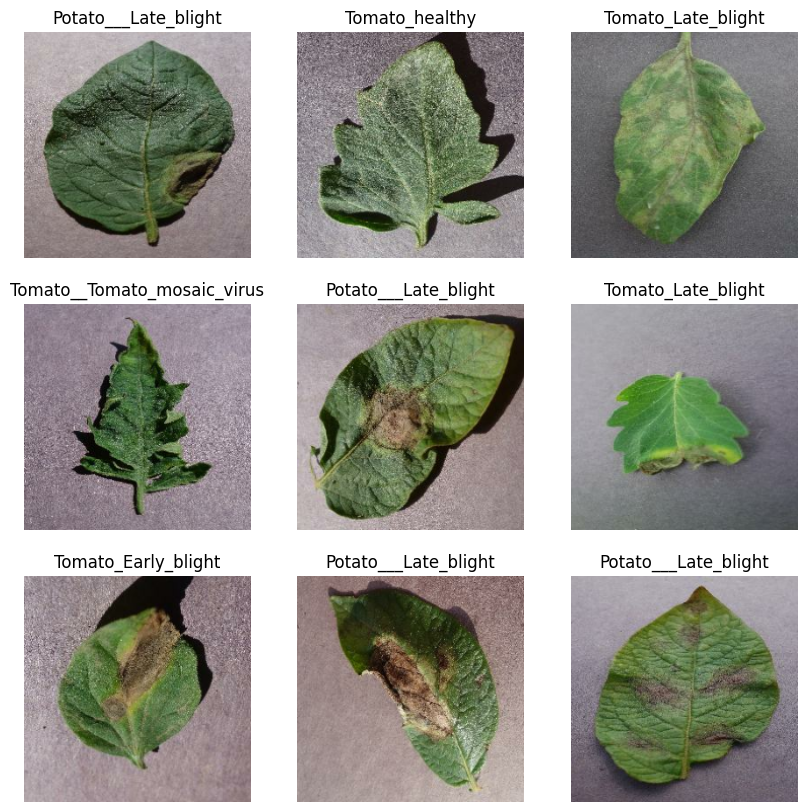

In [ ]:
# 3. Create Data Loader
def create_data_loaders(data_dir, image_size, batch_size, val_split):
    train_ds = image_dataset_from_directory(
        data_dir,
        validation_split=val_split,
        subset="training",
        seed=123,
        image_size=image_size,
        batch_size=batch_size,
        shuffle=True
    )

    val_ds = image_dataset_from_directory(
        data_dir,
        validation_split=val_split,
        subset="validation",
        seed=123,
        image_size=image_size,
        batch_size=batch_size,
        shuffle=True
    )

    # Get the actual class names from the dataset
    class_names = train_ds.class_names
    return train_ds, val_ds, class_names

train_ds, val_ds, CLASS_NAMES = create_data_loaders(DEST_DIR, IMAGE_SIZE, BATCH_SIZE, VAL_SPLIT)
print(f"Loaded classes: {CLASS_NAMES}")

# 4. Visualization
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(min(9, len(images))):  # Ensure we don't exceed batch size
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(CLASS_NAMES[labels[i]])
        plt.axis("off")
plt.show()

In [ ]:
with open('data_loader.py', 'w') as f:
    f.write('''
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

def load_dataset(data_dir, image_size=(224, 224), batch_size=32, val_split=0.2):
    train_ds = image_dataset_from_directory(
        data_dir,
        validation_split=val_split,
        subset="training",
        seed=123,
        image_size=image_size,
        batch_size=batch_size
    )

    val_ds = image_dataset_from_directory(
        data_dir,
        validation_split=val_split,
        subset="validation",
        seed=123,
        image_size=image_size,
        batch_size=batch_size
    )

    return train_ds, val_ds
''')
